In [2]:
# Q1 AmesHousing

import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'C:\\Users\\PC\\Desktop\\IT Innovation\\Individual 1\\AmesHousing.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define continuous and categorical variables
continuous_vars = [
    'Lot_Area', 'Year_Built', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
    'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Wood_Deck_SF', 
    'Open_Porch_SF', 'Enclosed_Porch', 'Screen_Porch'
]
categorical_vars = [
    'Street', 'Land_Contour', 'Lot_Config', 'Land_Slope', 'Condition_1', 
    'Bldg_Type', 'House_Style', 'Roof_Matl', 'Functional', 'Sale_Type'
]

# One-hot encode categorical variables and standardize continuous variables
independent_vars = continuous_vars + categorical_vars
X = pd.get_dummies(data[independent_vars], columns=categorical_vars)
scaler = StandardScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

# Define dependent variable
y = data['SalePrice']

# Split the dataset into training and validation sets based on 'Train' column
X_train = X[data['Train'] == 1]
X_valid = X[data['Train'] == 0]
y_train = y[data['Train'] == 1]
y_valid = y[data['Train'] == 0]

# Build the KNN model
knn_model = KNeighborsRegressor(n_neighbors=400, weights='uniform')
knn_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = knn_model.predict(X_train)
y_valid_pred = knn_model.predict(X_valid)

# Calculate R-Squared scores
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print("R-Squared on Training Set:", train_r2)
print("R-Squared on Validation Set:", valid_r2)


R-Squared on Training Set: 0.5576389840800198
R-Squared on Validation Set: 0.6071983478286356


In [5]:
# Q2 Build the KNN model with n_neighbors set to 2
knn_model = KNeighborsRegressor(n_neighbors=2, weights='uniform')
knn_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = knn_model.predict(X_train)
y_valid_pred = knn_model.predict(X_valid)

# Calculate R-Squared scores
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print("R-Squared on Training Set:", train_r2)
print("R-Squared on Validation Set:", valid_r2)


R-Squared on Training Set: 0.9292686275548451
R-Squared on Validation Set: 0.6892517179858109


In [6]:
# Q3 Build the KNN model with n_neighbors set to 5
y = data['SalePrice']

# Split the dataset into training and validation sets based on 'Train' column
X_train = X[data['Train'] == 1]
X_valid = X[data['Train'] == 0]
y_train = y[data['Train'] == 1]
y_valid = y[data['Train'] == 0]

# Build the KNN model with n_neighbors set to 5
knn_model_5 = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model_5.fit(X_train, y_train)

# Evaluate the model
y_train_pred_5 = knn_model_5.predict(X_train)
y_valid_pred_5 = knn_model_5.predict(X_valid)

# Calculate R-Squared scores for the model with n_neighbors = 5
train_r2_5 = r2_score(y_train, y_train_pred_5)
valid_r2_5 = r2_score(y_valid, y_valid_pred_5)

print("R-Squared on Training Set (n_neighbors=5):", train_r2_5)
print("R-Squared on Validation Set (n_neighbors=5):", valid_r2_5)

# Comparisons with previous models can be done based on the reported R-Squared scores
# The Q3 model (with n_neighbors = 5) outperforms both the Q1 and Q2 models in terms of balancing the fit on training data
# and generalizing well to validation data. It strikes a better balance between capturing the data's complexities 
# and not fitting to the noise, thus being a more robust model for this dataset.

R-Squared on Training Set (n_neighbors=5): 0.867565758863021
R-Squared on Validation Set (n_neighbors=5): 0.7166239112594475


In [13]:
#Q4 Setting up GridSearchCV with 10-fold cross-validation

from sklearn.model_selection import GridSearchCV, KFold


# Define dependent variable
y = data['SalePrice']

# Split the dataset into training and validation sets based on 'Train' column
X_train = X[data['Train'] == 1]
X_valid = X[data['Train'] == 0]
y_train = y[data['Train'] == 1]
y_valid = y[data['Train'] == 0]

# Setting up the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 50))
}

# Setting up the KNN estimator
knn = KNeighborsRegressor()

# Setting up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=KFold(n_splits=10, shuffle=True, random_state=12),
                           verbose=4)

# Conduct the grid search on the training set
grid_search.fit(X_train, y_train)

# Output the best number of neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Build a KNN model with the optimal parameter
optimal_knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
optimal_knn_model.fit(X_train, y_train)

# Evaluate the optimal model
optimal_y_train_pred = optimal_knn_model.predict(X_train)
optimal_y_valid_pred = optimal_knn_model.predict(X_valid)

# Calculate R-Squared scores
optimal_train_r2 = r2_score(y_train, optimal_y_train_pred)
optimal_valid_r2 = r2_score(y_valid, optimal_y_valid_pred)

print("Optimal n_neighbors:", best_n_neighbors)
print("R-Squared on Training Set (Optimal):", optimal_train_r2)
print("R-Squared on Validation Set (Optimal):", optimal_valid_r2)


Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.665 total time=   0.0s
[CV 2/10] END ....................n_neighbors=1;, score=0.748 total time=   0.0s
[CV 3/10] END ....................n_neighbors=1;, score=0.664 total time=   0.0s
[CV 4/10] END ....................n_neighbors=1;, score=0.701 total time=   0.0s
[CV 5/10] END ....................n_neighbors=1;, score=0.726 total time=   0.0s
[CV 6/10] END ....................n_neighbors=1;, score=0.683 total time=   0.0s
[CV 7/10] END ....................n_neighbors=1;, score=0.711 total time=   0.0s
[CV 8/10] END ....................n_neighbors=1;, score=0.675 total time=   0.0s
[CV 9/10] END ....................n_neighbors=1;, score=0.793 total time=   0.0s
[CV 10/10] END ...................n_neighbors=1;, score=0.703 total time=   0.0s
[CV 1/10] END ....................n_neighbors=2;, score=0.722 total time=   0.0s
[CV 2/10] END ....................n_neighbors=

In [14]:
#Q5 Coefficients for Lot_Area, Year_Built, C(Land_Contour)[T.HLS], and C(Bldg_Type)[T.Twnhs]

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.metrics import r2_score


# Define continuous and categorical variables
continuous_vars = ['Lot_Area', 'Year_Built', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
                   'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Wood_Deck_SF', 'Open_Porch_SF', 
                   'Enclosed_Porch', 'Screen_Porch']
categorical_vars = ['Street', 'Land_Contour', 'Lot_Config', 'Land_Slope', 'Condition_1', 
                    'Bldg_Type', 'House_Style', 'Roof_Matl', 'Functional', 'Sale_Type']

# Preparing the formula for the linear regression model
categorical_vars = ['C(' + var + ')' for var in categorical_vars]
formula = "SalePrice ~ " + " + ".join(continuous_vars + categorical_vars)

# Split the dataset into training and validation sets based on 'Train' column
train_data = data[data['Train'] == 1]
valid_data = data[data['Train'] == 0]

# Fit the model using statsmodels on the training data
model = smf.ols(formula, data=train_data).fit()

# Coefficients for Lot_Area, Year_Built, C(Land_Contour)[T.HLS], and C(Bldg_Type)[T.Twnhs]
coefficients = model.params[['Lot_Area', 'Year_Built', 'C(Land_Contour)[T.HLS]', 'C(Bldg_Type)[T.Twnhs]']]

# R-Squared on training set
train_r2 = model.rsquared

# Predict on validation set and calculate R-Squared
y_valid_pred = model.predict(valid_data)
valid_r2 = r2_score(valid_data['SalePrice'], y_valid_pred)

train_r2, valid_r2, coefficients


(0.835285404778949,
 0.7895431998269554,
 Lot_Area                      0.643024
 Year_Built                  654.556160
 C(Land_Contour)[T.HLS]    25407.098677
 C(Bldg_Type)[T.Twnhs]    -16145.143625
 dtype: float64)

In [16]:
#Q6 Fit the model using statsmodels on the training data with interaction terms

import pandas as pd
import statsmodels.formula.api as smf
import itertools
from sklearn.metrics import r2_score


# Define continuous and categorical variables
continuous_vars = ['Lot_Area', 'Year_Built', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
                   'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Wood_Deck_SF', 'Open_Porch_SF', 
                   'Enclosed_Porch', 'Screen_Porch']
categorical_vars = ['Street', 'Land_Contour', 'Lot_Config', 'Land_Slope', 'Condition_1', 
                    'Bldg_Type', 'House_Style', 'Roof_Matl', 'Functional', 'Sale_Type']

# Preparing the formula for the linear regression model with interaction terms
categorical_vars = ['C(' + var + ')' for var in categorical_vars]
independent_vars = continuous_vars + categorical_vars
interaction_terms = ['{}:{}'.format(var1, var2) for var1, var2 in itertools.combinations(independent_vars, 2)]
formula_interactions = "SalePrice ~ " + " + ".join(independent_vars) + " + " + " + ".join(interaction_terms)

# Split the dataset into training and validation sets based on 'Train' column
train_data = data[data['Train'] == 1]
valid_data = data[data['Train'] == 0]

# Fit the model using statsmodels on the training data with interaction terms
model_interactions = smf.ols(formula_interactions, data=train_data).fit()

# R-Squared on training set with interaction terms
train_r2_interactions = model_interactions.rsquared

# Predict on validation set and calculate R-Squared with interaction terms
y_valid_pred_interactions = model_interactions.predict(valid_data)
valid_r2_interactions = r2_score(valid_data['SalePrice'], y_valid_pred_interactions)

train_r2_interactions, valid_r2_interactions

# The model is overfitting due to its complexity, as evidenced by the high number of interaction terms. 
# While it fits the training data very well, its predictive power on the validation set is extremely poor. 
# To improve the model, it would be advisable to reduce its complexity by removing some interaction terms 
# or using regularization techniques to penalize overly complex models.

(0.9396024858295933, -37.53639084245039)

In [17]:
#Q7 Backward stepwise selection

import pandas as pd
import statsmodels.formula.api as smf
import itertools
from sklearn.metrics import r2_score
import re


# Define continuous and categorical variables
continuous_vars = ['Lot_Area', 'Year_Built', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
                   'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Wood_Deck_SF', 'Open_Porch_SF', 
                   'Enclosed_Porch', 'Screen_Porch']
categorical_vars = ['Street', 'Land_Contour', 'Lot_Config', 'Land_Slope', 'Condition_1', 
                    'Bldg_Type', 'House_Style', 'Roof_Matl', 'Functional', 'Sale_Type']

# Prepare the independent variables and interaction terms
categorical_vars = ['C(' + var + ')' for var in categorical_vars]
independent_vars = continuous_vars + categorical_vars
interaction_terms = ['{}:{}'.format(var1, var2) for var1, var2 in itertools.combinations(independent_vars, 2)]

# Function to fit the model and remove a variable with the highest p-value
def fit_and_remove_a_variable(vars, data):
    model_fun = smf.ols(formula=f"SalePrice ~ {' + '.join(vars)}", data=data).fit()
    p_values = model_fun.pvalues.drop('Intercept')
    max_p_var = re.sub(r'\[.*?\]', '', p_values.idxmax())
    while max_p_var not in vars:
        p_values = p_values.drop(p_values.idxmax())
        max_p_var = re.sub(r'\[.*?\]', '', p_values.idxmax())
    vars.remove(max_p_var)
    print(f"Removed: {max_p_var}")
    return model_fun, vars

# Split the dataset into training and validation sets
train_data = data[data['Train'] == 1]
valid_data = data[data['Train'] == 0]

# Backward stepwise selection
selected_vars = independent_vars + interaction_terms
best_model = None
best_valid_r2 = float('-inf')
best_model_vars = []

while len(selected_vars) > 5:
    model, selected_vars = fit_and_remove_a_variable(selected_vars, train_data)
    train_r2 = model.rsquared
    y_valid_pred = model.predict(valid_data)
    valid_r2 = r2_score(valid_data['SalePrice'], y_valid_pred)

    # Track the best model based on validation R-Squared
    if valid_r2 > best_valid_r2:
        best_valid_r2 = valid_r2
        best_model = model
        best_model_vars = selected_vars.copy()

    print(f"Model size: {len(selected_vars)}, Train R2: {train_r2}, Validation R2: {valid_r2}")

# Final selected model
final_formula = "SalePrice ~ " + " + ".join(best_model_vars)
print("Best Model Formula:", final_formula)
print("Best Model Train R2:", best_model.rsquared)
print("Best Model Validation R2:", best_valid_r2)


Removed: Open_Porch_SF:C(Sale_Type)
Model size: 252, Train R2: 0.9396024858295933, Validation R2: -37.53639084245039
Removed: Kitchen_AbvGr:C(House_Style)
Model size: 251, Train R2: 0.93959789096031, Validation R2: -38.89006152192176
Removed: C(House_Style):C(Functional)
Model size: 250, Train R2: 0.9395978909603901, Validation R2: -80.95908561123598
Removed: C(Land_Contour):C(House_Style)
Model size: 249, Train R2: 0.9394748787853219, Validation R2: -70.49868759737791
Removed: Second_Flr_SF:C(Bldg_Type)
Model size: 248, Train R2: 0.9386471070010632, Validation R2: -73.19111813221527
Removed: C(Condition_1):C(Bldg_Type)
Model size: 247, Train R2: 0.9386471070008774, Validation R2: -74.26799865228175
Removed: Screen_Porch:C(Bldg_Type)
Model size: 246, Train R2: 0.9386383446428282, Validation R2: -806.2192574068098
Removed: Lot_Area:Gr_Liv_Area
Model size: 245, Train R2: 0.9384954671982455, Validation R2: -820.0731928424227
Removed: C(Condition_1):C(House_Style)
Model size: 244, Train R2

In [18]:
#Q8 Predict on validation set and calculate R-Squared

import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score


# Define continuous and categorical variables
continuous_vars = [
    'Lot_Area', 'Year_Built', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
    'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Wood_Deck_SF', 
    'Open_Porch_SF', 'Enclosed_Porch', 'Screen_Porch'
]
categorical_vars = [
    'Street', 'Land_Contour', 'Lot_Config', 'Land_Slope', 'Condition_1', 
    'Bldg_Type', 'House_Style', 'Roof_Matl', 'Functional', 'Sale_Type'
]

# Convert categorical variables to a format suitable for the formula
categorical_vars_formula = ['C(' + var + ')' for var in categorical_vars]

# Prepare the formula
formula_ln = "LnSalePrice ~ " + " + ".join(continuous_vars + categorical_vars_formula)

# Split the dataset into training and validation sets
train_data = data[data['Train'] == 1]
valid_data = data[data['Train'] == 0]

# Fit the model using statsmodels
model_ln = smf.ols(formula_ln, data=train_data).fit()

# Get R-Squared on the training set
train_r2_ln = model_ln.rsquared

# Predict on validation set and calculate R-Squared
y_valid_pred_ln = model_ln.predict(valid_data)
valid_r2_ln = r2_score(valid_data['LnSalePrice'], y_valid_pred_ln)

# Coefficients for specific variables
coefficients_ln = model_ln.params[['Lot_Area', 'Year_Built', 'C(Land_Contour)[T.HLS]', 'C(Bldg_Type)[T.Twnhs]']]

print("Training R-Squared:", train_r2_ln)
print("Validation R-Squared:", valid_r2_ln)
print("Coefficients:\n", coefficients_ln)

Training R-Squared: 0.853618715448573
Validation R-Squared: 0.8178538483106094
Coefficients:
 Lot_Area                  0.000003
Year_Built                0.004407
C(Land_Contour)[T.HLS]    0.081878
C(Bldg_Type)[T.Twnhs]    -0.122887
dtype: float64


In [19]:
pip install pandas matplotlib seaborn statsmodels

Note: you may need to restart the kernel to use updated packages.


C:\Users\PC\AppData\Local\Temp\ipykernel_17972\101466687.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='izlaw', y='avgprice', data=before_policy_df, ci=None)


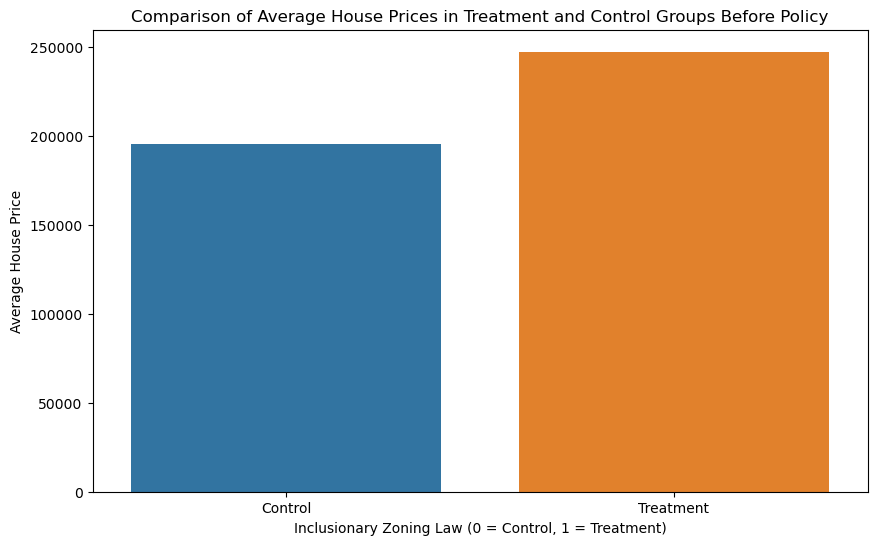

                            OLS Regression Results                            
Dep. Variable:               avgprice   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.427
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0117
Time:                        02:36:35   Log-Likelihood:                -4054.2
No. Observations:                 311   AIC:                             8112.
Df Residuals:                     309   BIC:                             8120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.954e+05   6676.613     29.272      0.0

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
#Q1 Create a bar chart to compare the avgprice in the Treatment (izlaw = 1) and Control (izlaw = 0) groups


df = pd.read_csv('C:\\Users\\PC\\Desktop\\IT Innovation\\Individual 1\\CaliforniaZoningCase.csv')

#Q1 Filter the dataset for observations before the policy implementation
before_policy_df = df[df['after'] == 0]

# Create a bar chart to compare the avgprice in the Treatment (izlaw = 1) and Control (izlaw = 0) groups
plt.figure(figsize=(10, 6))
sns.barplot(x='izlaw', y='avgprice', data=before_policy_df, ci=None)
plt.title('Comparison of Average House Prices in Treatment and Control Groups Before Policy')
plt.xlabel('Inclusionary Zoning Law (0 = Control, 1 = Treatment)')
plt.ylabel('Average House Price')
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.show()

# Run a regression with avgprice as the dependent variable and izlaw as the independent variable
X = before_policy_df[['izlaw']]
X = sm.add_constant(X) # adding a constant
y = before_policy_df['avgprice']

model = sm.OLS(y, X).fit()
regression_result = model.summary()

print(regression_result)


C:\Users\PC\AppData\Local\Temp\ipykernel_17972\2947333387.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='izlaw', y='avgprice', data=after_policy_df, ci=None)


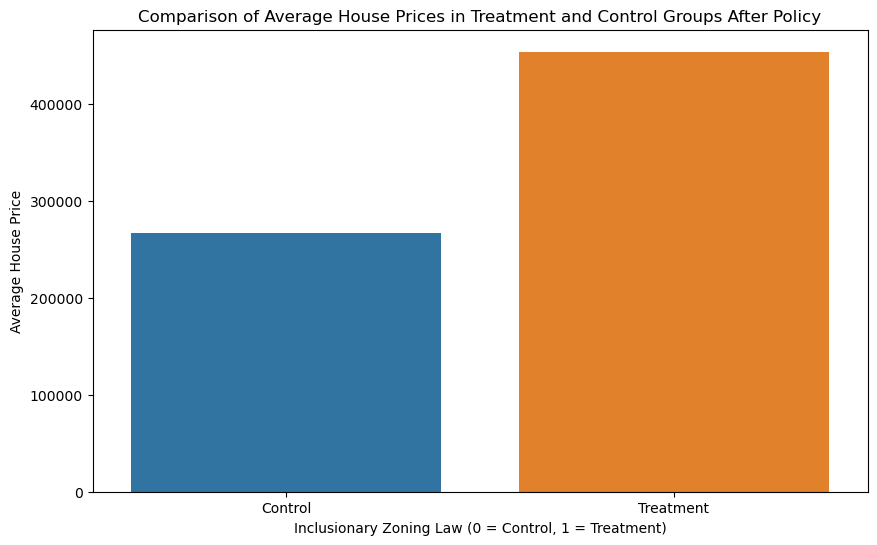

                            OLS Regression Results                            
Dep. Variable:               avgprice   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     19.88
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.16e-05
Time:                        02:40:13   Log-Likelihood:                -4276.5
No. Observations:                 311   AIC:                             8557.
Df Residuals:                     309   BIC:                             8565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.674e+05   1.36e+04     19.594      0.0

In [22]:
#Q2 Filter the dataset for observations after the policy implementation
after_policy_df = df[df['after'] == 1]

# Create a bar chart to compare the avgprice in the Treatment (izlaw = 1) and Control (izlaw = 0) groups after the policy
plt.figure(figsize=(10, 6))
sns.barplot(x='izlaw', y='avgprice', data=after_policy_df, ci=None)
plt.title('Comparison of Average House Prices in Treatment and Control Groups After Policy')
plt.xlabel('Inclusionary Zoning Law (0 = Control, 1 = Treatment)')
plt.ylabel('Average House Price')
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.show()

# Run a regression with avgprice as the dependent variable and izlaw as the independent variable for after-policy data
X_after = after_policy_df[['izlaw']]
X_after = sm.add_constant(X_after) # adding a constant
y_after = after_policy_df['avgprice']

model_after = sm.OLS(y_after, X_after).fit()
regression_result_after = model_after.summary()

print(regression_result_after)


In [24]:
#Q3 Formula for the logistic regression model
import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame containing the dataset
# Load your dataset here if not already loaded
# df = pd.read_csv('your_file_path.csv')

formula = 'izlaw ~ lnunits + lnhhlds + lnpop + density + lnmedhhinc + educattain + proppoverty + meantttw + prop65'

# Estimating the logistic regression model
logit_model = smf.logit(formula, data=df).fit()

# Output the summary of the logistic regression model
print(logit_model.summary2())


Optimization terminated successfully.
         Current function value: 0.291769
         Iterations 9
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: izlaw            Pseudo R-squared: 0.138     
Date:               2023-11-17 02:45 AIC:              382.9612  
No. Observations:   622              BIC:              427.2906  
Df Model:           9                Log-Likelihood:   -181.48   
Df Residuals:       612              LL-Null:          -210.42   
Converged:          1.0000           LLR p-value:      3.4158e-09
No. Iterations:     9.0000           Scale:            1.0000    
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept        -3.0018  20.4247 -0.1470 0.8832 -43.0334 37.0298
lnunits         -13.0958   6.6376 -1.9730 0.0485 -26.1053 -0.0863


In [25]:
#Q4 Formula for the Difference-in-Differences model

import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'df' is your DataFrame containing the dataset
# Load your dataset here if not already loaded
# df = pd.read_csv('your_file_path.csv')

# Formula for the Difference-in-Differences model
formula = 'avgprice ~ after + izlaw + izlaw:after'

# Estimating the Difference-in-Differences model
diff_in_diff_model = smf.ols(formula, data=df).fit()

# Output the summary of the Difference-in-Differences model
print(diff_in_diff_model.summary())


                            OLS Regression Results                            
Dep. Variable:               avgprice   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     23.55
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.92e-14
Time:                        02:47:31   Log-Likelihood:                -8404.2
No. Observations:                 622   AIC:                         1.682e+04
Df Residuals:                     618   BIC:                         1.683e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.954e+05   1.07e+04     18.191      

In [26]:
#Q5 Formula for the extended Difference-in-Differences model
formula = 'avgprice ~ after + izlaw + izlaw:after + lnunits + lnhhlds + lnpop + density + lnmedhhinc + educattain + proppoverty + meantttw + prop65'

# Estimating the extended Difference-in-Differences model
extended_diff_in_diff_model = smf.ols(formula, data=df).fit()

# Output the summary of the extended Difference-in-Differences model
print(extended_diff_in_diff_model.summary())


                            OLS Regression Results                            
Dep. Variable:               avgprice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     147.5
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          3.48e-171
Time:                        02:51:29   Log-Likelihood:                -8014.1
No. Observations:                 622   AIC:                         1.605e+04
Df Residuals:                     609   BIC:                         1.611e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.003e+06   5.96e+05     -8.397      

In [27]:
#Q6 Formula for the Difference-in-Differences model with lnprice as the dependent variable
formula = 'lnprice ~ after + izlaw + izlaw:after'

# Estimating the Difference-in-Differences model
ln_diff_in_diff_model = smf.ols(formula, data=df).fit()

# Output the summary of the Difference-in-Differences model
print(ln_diff_in_diff_model.summary())


                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           5.01e-16
Time:                        02:54:11   Log-Likelihood:                -500.20
No. Observations:                 622   AIC:                             1008.
Df Residuals:                     618   BIC:                             1026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0646      0.033    370.785      

In [28]:
#Q7 Formula for the extended Difference-in-Differences model with lnprice as the dependent variable
formula = 'lnprice ~ after + izlaw + izlaw:after + lnunits + lnhhlds + lnpop + density + lnmedhhinc + educattain + proppoverty + meantttw + prop65'

# Estimating the extended Difference-in-Differences model
extended_ln_diff_in_diff_model = smf.ols(formula, data=df).fit()

# Output the summary of the extended Difference-in-Differences model
print(extended_ln_diff_in_diff_model.summary())


                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     231.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.19e-217
Time:                        02:56:39   Log-Likelihood:                -4.0697
No. Observations:                 622   AIC:                             34.14
Df Residuals:                     609   BIC:                             91.77
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0007      1.521      0.658      